In [1]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation
from dimension_reduction import display_umap_2d_plot, display_pca_2d_plot, display_tsne_2d_plot

2023-05-19 20:43:32.341201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = "data/SingleCell_new_split/newSplitTrainCounts.tsv"
test_data_path = "data/SingleCell_new_split/newSplitTestBCounts.tsv"
train_classes_path = "data/SingleCell_new_split/newSplitTrainSamples.tsv"
test_classes_path = "data/SingleCell_new_split/newSplitTestBSamples.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 176
CTC cells number in train data: 130
WBC cells number in train data: 38
CTC-WBC cells number in test data: 8

Total cells number in test data: 29154
CTC cells number in test data: 1534
WBC cells number in test data: 27620
CTC-WBC cells number in test data: 0


In [3]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.3
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=5
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 67


In [4]:
calculate_global_statistics(cut_by_mean_max_train_data, data_object.train_classes)

CTC mean: 1.3878185937553742
WBC mean: 1.5953677170154843
CTC standard deviation: 1.4652900397345212
WBC standard deviation: 1.6676982620698146
CTC non-zero values: 70.62513519359723 %
WBC non-zero values: 69.87431264728987 %
T-test p-values: 0.00022222264604727357


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


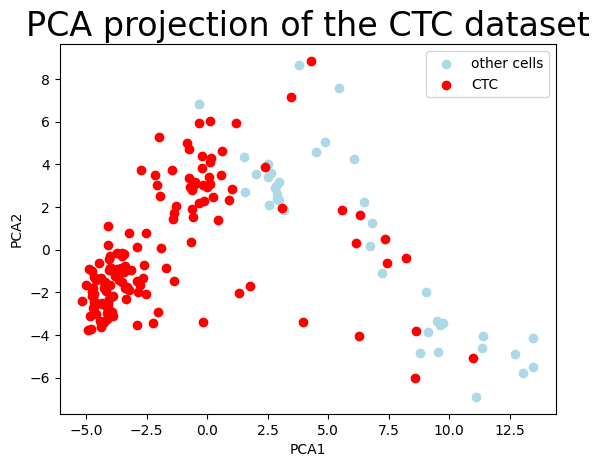

In [5]:
display_pca_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

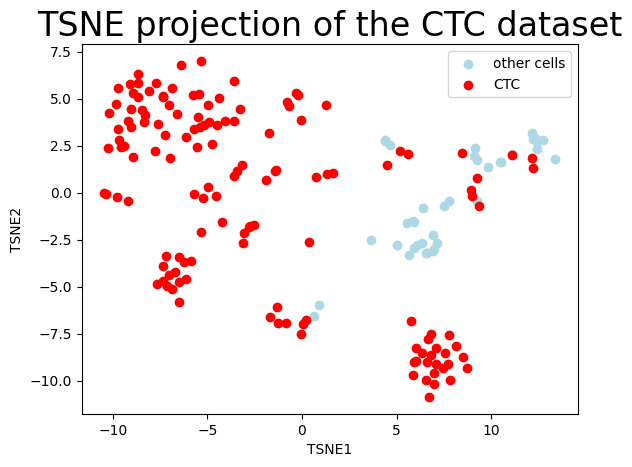

In [6]:
display_tsne_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

In [7]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=1.6
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 67


In [8]:
calculate_global_statistics(cut_by_mean_with_classes_train_data, data_object.train_classes)

CTC mean: 2.183716460783793
WBC mean: 2.3405462298330475
CTC standard deviation: 1.0421085708740032
WBC standard deviation: 1.1590088328941146
CTC non-zero values: 95.18710793856803 %
WBC non-zero values: 94.10840534171248 %
T-test p-values: 3.004350923767403e-16


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


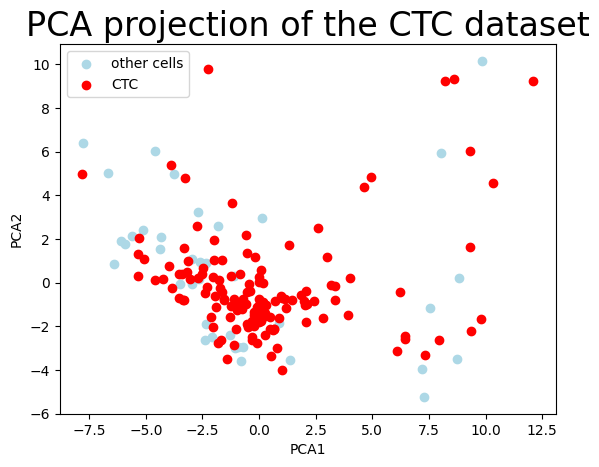

In [9]:
display_pca_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

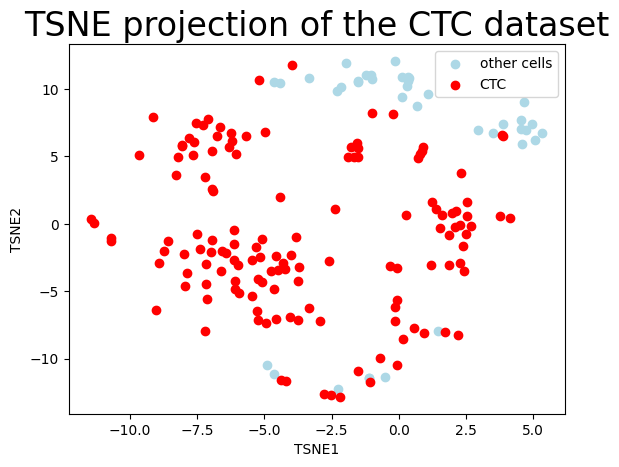

In [10]:
display_tsne_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

In [11]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
cut_by_mean_with_classes_features = np.array(cut_by_mean_with_classes_train_data.columns)
cut_by_mean_max_features = np.array(cut_by_mean_max_train_data.columns)
cut_by_mean_with_classes_common_features = np.intersect1d(biological_features, cut_by_mean_with_classes_features)
cut_by_mean_max_common_features = np.intersect1d(biological_features, cut_by_mean_max_features)

print(f"Common features for cut by mean with classes: {cut_by_mean_with_classes_common_features}")
print(f"Common features for cut by mean and max: {cut_by_mean_max_common_features}")

Common features for cut by mean with classes: []
Common features for cut by mean and max: []


### Biological features

In [12]:
biological_features = np.unique(np.intersect1d(biological_features, data_object.train_data.columns))
biological_features_train_data = data_object.train_data[biological_features]
biological_features_test_data = data_object.test_data[biological_features]

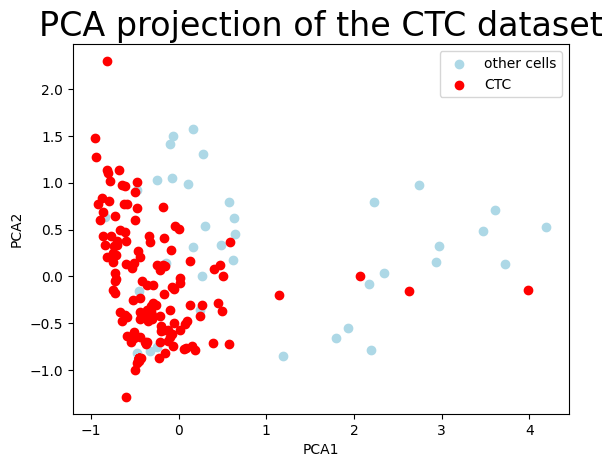

In [13]:
display_pca_2d_plot(biological_features_train_data, data_object.train_classes, 42)

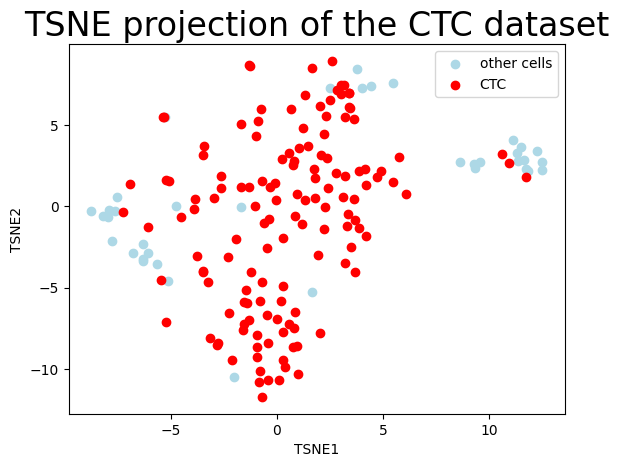

In [14]:
display_tsne_2d_plot(biological_features_train_data, data_object.train_classes, 42)

### Cut by mean max and biological

In [15]:
cut_by_mean_max_features_merged = np.unique(np.concatenate((cut_by_mean_max_features, biological_features)))
cut_by_mean_max_merged_train_data = data_object.train_data[cut_by_mean_max_features_merged]
cut_by_mean_max_merged_test_data = data_object.test_data[cut_by_mean_max_features_merged]

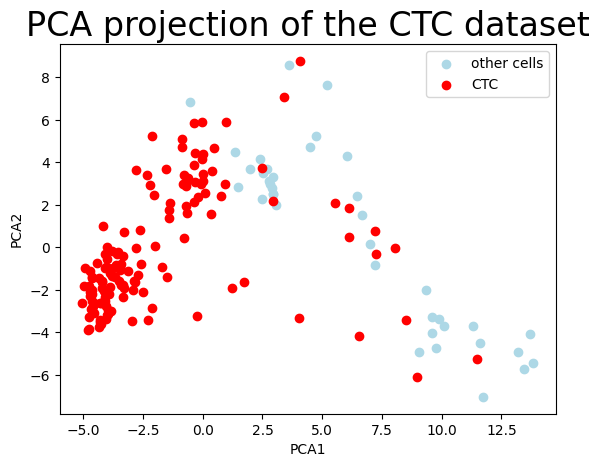

In [16]:
display_pca_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

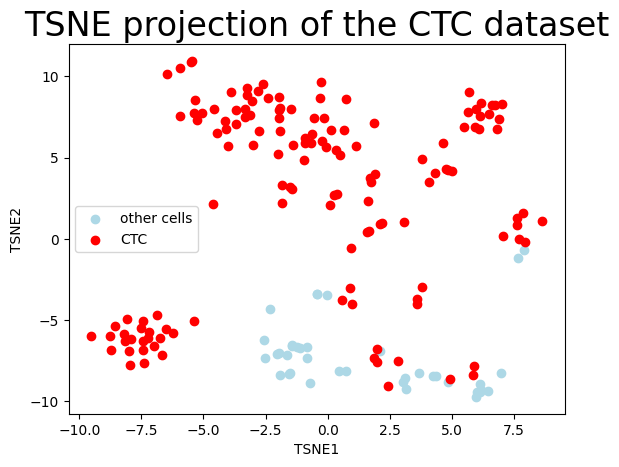

In [17]:
display_tsne_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

### Cut by mean with classes and biological

In [18]:
cut_by_mean_with_classes_features_merged = np.concatenate((cut_by_mean_with_classes_features, biological_features))
cut_by_mean_with_classes_merged_train_data = data_object.train_data[cut_by_mean_with_classes_features_merged]
cut_by_mean_with_classes_merged_test_data = data_object.test_data[cut_by_mean_with_classes_features_merged]

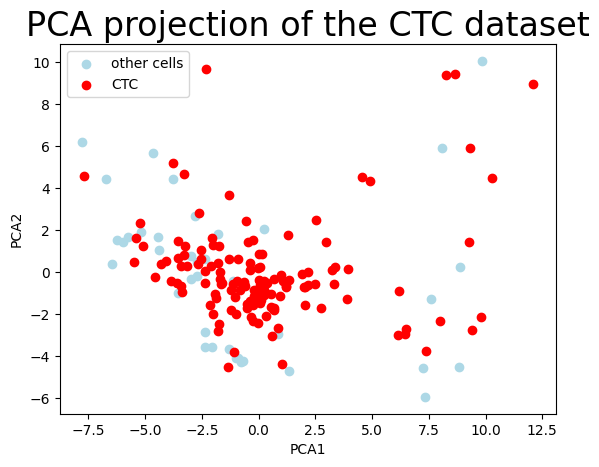

In [19]:
display_pca_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

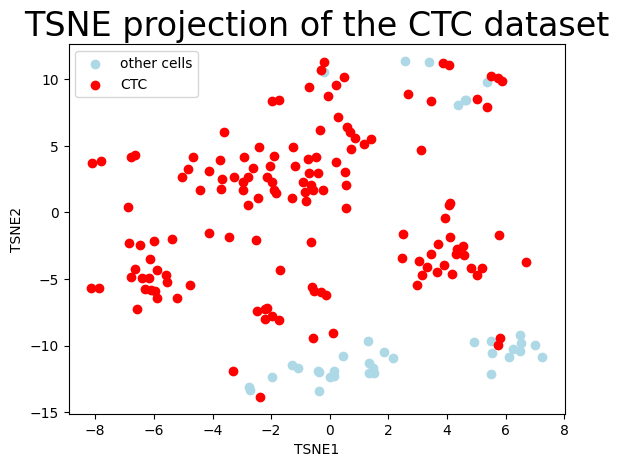

In [20]:
display_tsne_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

### LightGBM

In [21]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [22]:
lgbm_model_object = Model(
    lgbm_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.7846989966555183
Training balanced accuracy 0.9866666666666667

Validation roc auc 0.9421451133407656
Training roc auc 0.9991304347826087

Validation precision 0.9041077969649397
Training precision 0.992831541218638

Validation recall 0.9347826086956522
Training recall 1.0

Validation f1 0.917366468118348
Training f1 0.9963963963963964



In [23]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.6296948073138872

Test roc auc 0.6433674863839384

Test precision 0.07982244257887193

Test recall 0.7509778357235984

Test f1 score 0.144068980687539


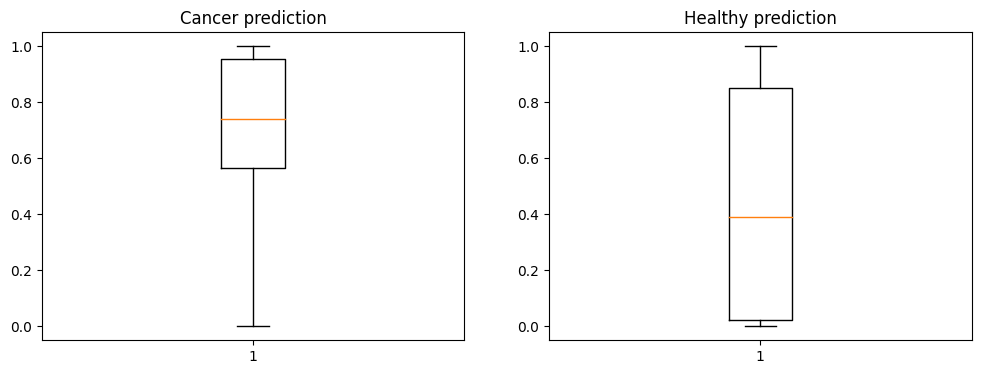

In [24]:
vis = Visualisation(lgbm_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

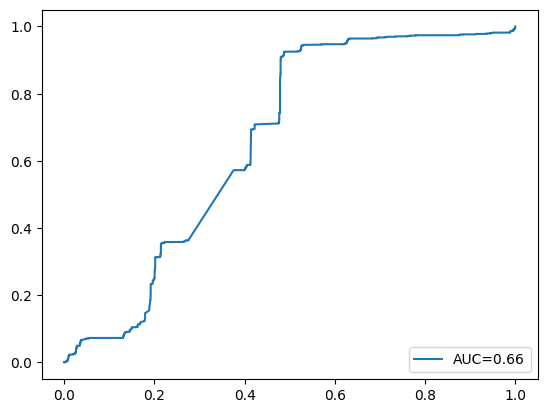

In [25]:
vis.draw_roc_curve_from_probabilities()

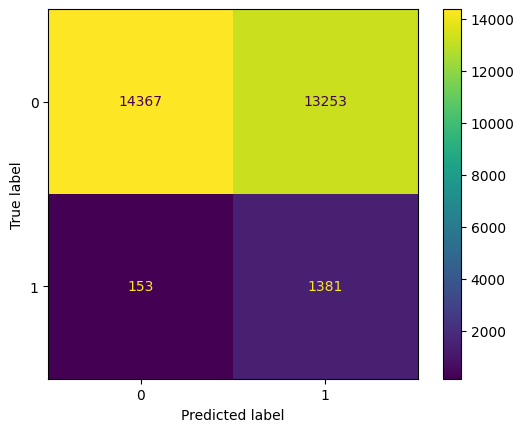

In [26]:
vis.display_confusion_matrix()

In [27]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,1521.333333
MYCBP2,529.666667
TWISTNB,223.000000
MYCBP,161.333333
MYC,145.333333
CD14,96.000000
ZEB1,55.666667
IL3RA,39.333333
ZEB2-AS1,21.666667
MYCBP2-AS1,11.666667


### Cut by mean max and biological

In [28]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9130899293942772
Training balanced accuracy 1.0

Validation roc auc 0.9783537718320326
Training roc auc 1.0

Validation precision 0.9644324913427903
Training precision 1.0

Validation recall 0.9565217391304347
Training recall 1.0

Validation f1 0.9597580814612158
Training f1 1.0



In [29]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.8072906232563936

Test roc auc 0.9615267234187447

Test precision 0.2612176378376288

Test recall 0.9667535853976532

Test f1 score 0.36196841544256175


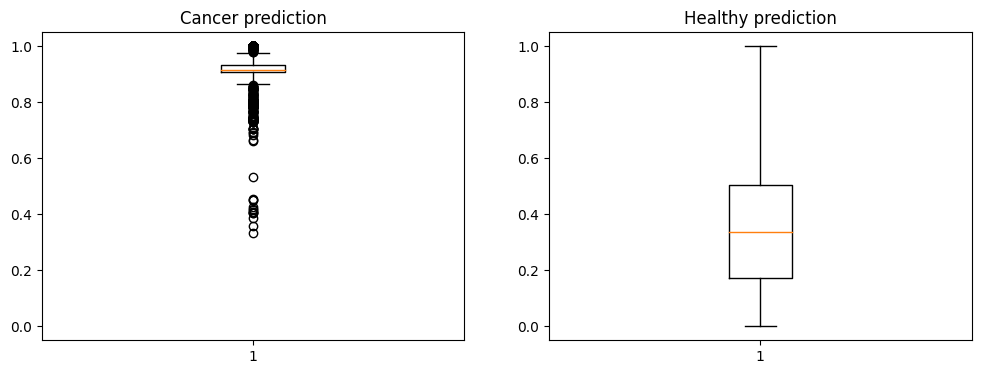

In [30]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

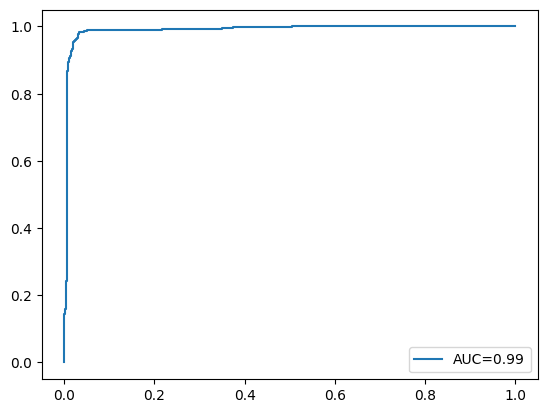

In [31]:
vis.draw_roc_curve_from_probabilities()

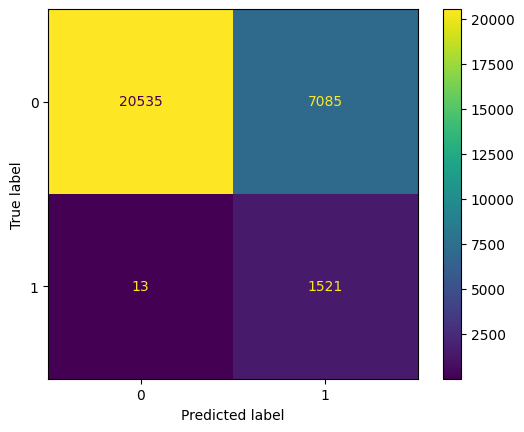

In [32]:
vis.display_confusion_matrix()

In [33]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
HLA-E,69.333333
ACTG1,39.666667
KRT19,35.333333
ZEB2,34.333333
SPINT2,34.000000
...,...
NR4A1,1.333333
PF4,0.666667
MGP,0.666667
MYCBP2-AS1,0.666667


### Cut by mean with classes and biological

In [34]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9067261241174286
Training balanced accuracy 1.0

Validation roc auc 0.9808156819026385
Training roc auc 1.0

Validation precision 0.969681309216193
Training precision 1.0

Validation recall 0.9202898550724639
Training recall 1.0

Validation f1 0.9442317981643824
Training f1 1.0



In [35]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.8444723841065228

Test roc auc 0.9585521406963128

Test precision 0.2592471303603168

Test recall 0.9984789222077358

Test f1 score 0.3771903860706834


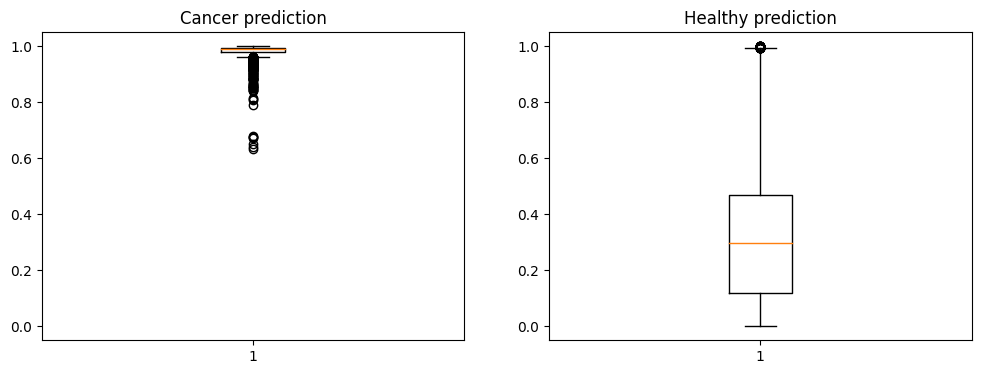

In [36]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

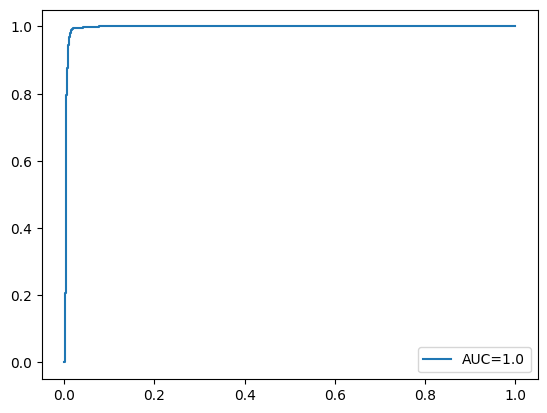

In [37]:
vis.draw_roc_curve_from_probabilities()

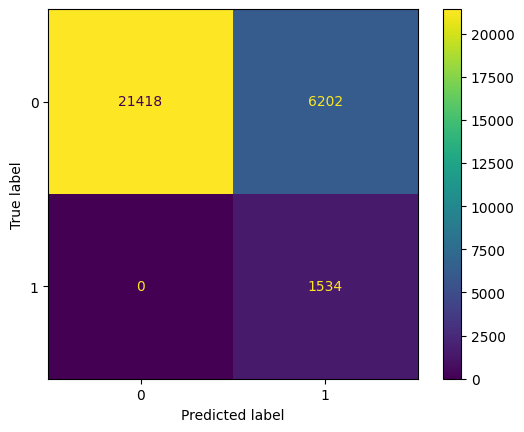

In [38]:
vis.display_confusion_matrix()

In [39]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ACTG1,90.000000
FTL,60.666667
ZEB2,50.000000
TPT1,40.666667
B2M,35.666667
...,...
RPL30,1.000000
TWISTNB,1.000000
ZEB2-AS1,1.000000
TMSB10,0.666667


### XGBoost

In [40]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    # min_child_weight=48,  # Jedyna zmiana w porownaniu do poprzedniego podzialu
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [41]:
xgboost_model_object = Model(
    xgb_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8426235600148644
Training balanced accuracy 0.9649275362318841

Validation roc auc 0.9296033073206985
Training roc auc 0.9969676700111482

Validation precision 0.9345377097387995
Training precision 0.9924203273040483

Validation recall 0.9202898550724639
Training recall 0.9565217391304347

Validation f1 0.9262432384814229
Training f1 0.9740297156027493



In [42]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.6768759041577805

Test roc auc 0.691431864935467

Test precision 0.0897814349058499

Test recall 0.8281182094741416

Test f1 score 0.16163206945223055


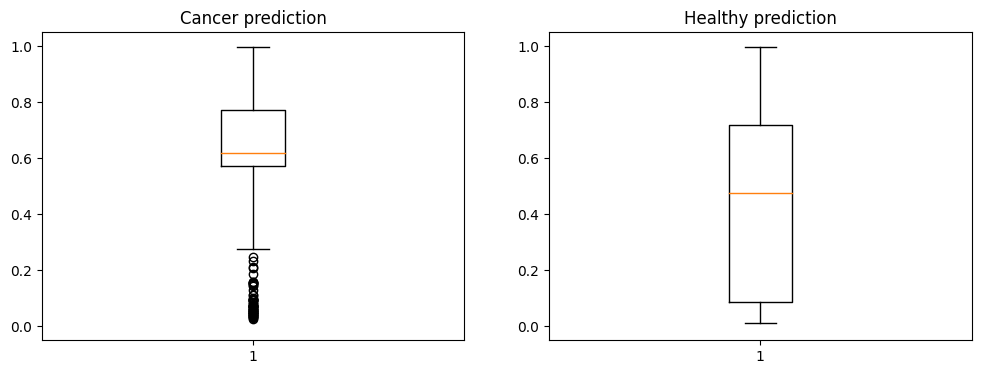

In [43]:
vis = Visualisation(xgboost_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

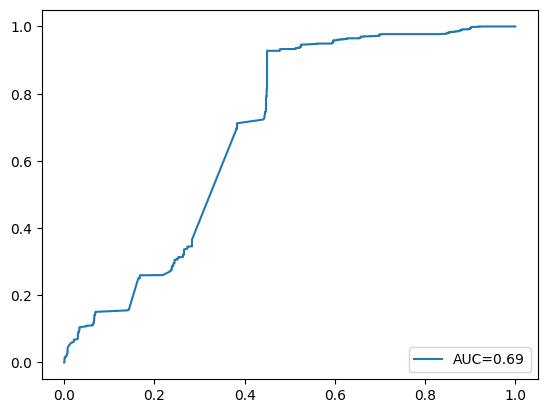

In [44]:
vis.draw_roc_curve_from_probabilities()

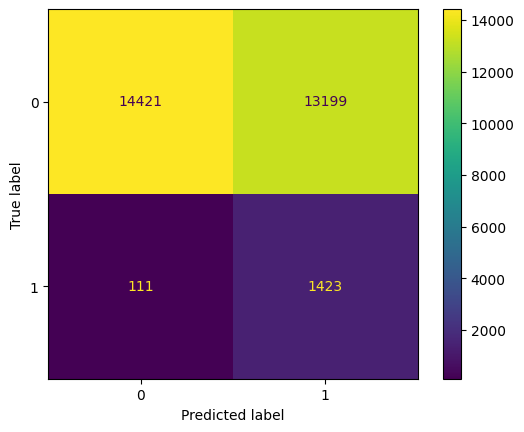

In [45]:
vis.display_confusion_matrix()

In [46]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.412078
SNAI3,0.089916
MYCBP2,0.086555
MYCBP,0.071229
CD14,0.071142
TWISTNB,0.067565
MYCBP2-AS1,0.064698
IL3RA,0.060413
ZEB1,0.055104
ZEB2-AS1,0.013845


### Cut by mean max and biological

In [47]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8821534745447789
Training balanced accuracy 0.9909420289855072

Validation roc auc 0.9722918989223337
Training roc auc 1.0

Validation precision 0.9560185185185186
Training precision 1.0

Validation recall 0.9202898550724639
Training recall 0.9818840579710145

Validation f1 0.9364928325838765
Training f1 0.9908321508720023



In [48]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.7838462230790316

Test roc auc 0.9781936969129376

Test precision 0.40133858955569046

Test recall 0.7081703607127338

Test f1 score 0.30660147103931


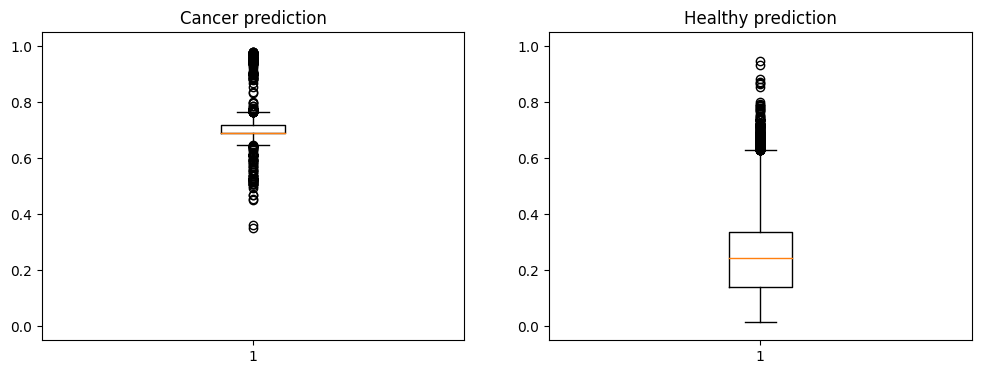

In [49]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

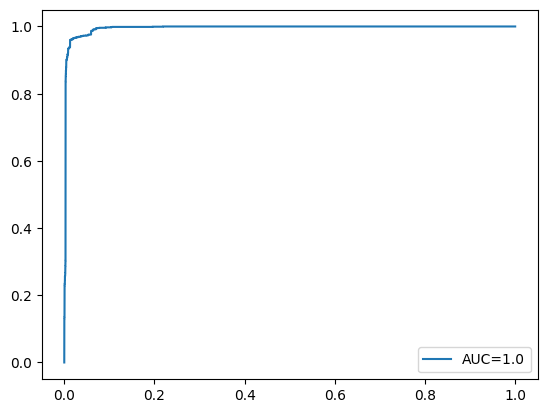

In [50]:
vis.draw_roc_curve_from_probabilities()

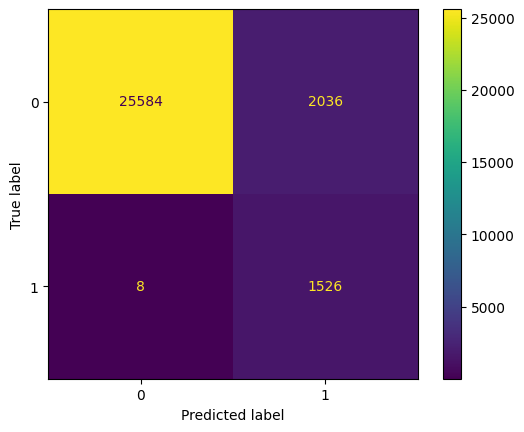

In [51]:
vis.display_confusion_matrix()

In [52]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.455793
HLA-E,0.155766
LMNA,0.122906
NFKBIA,0.030616
ZEB2,0.029531
CCL4,0.027310
TLN1,0.025727
ACTG1,0.023738
SPINT2,0.019113
PTK2,0.016474


### Cut by mean with classes and biological

In [53]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8902824228911186
Training balanced accuracy 1.0

Validation roc auc 0.9699228911185432
Training roc auc 1.0

Validation precision 0.9631093544137023
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 1.0

Validation f1 0.9368815592203897
Training f1 1.0



In [54]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.8768145229178134

Test roc auc 0.9847892771489649

Test precision 0.3049407192241455

Test recall 0.9876140808344198

Test f1 score 0.4245861397860269


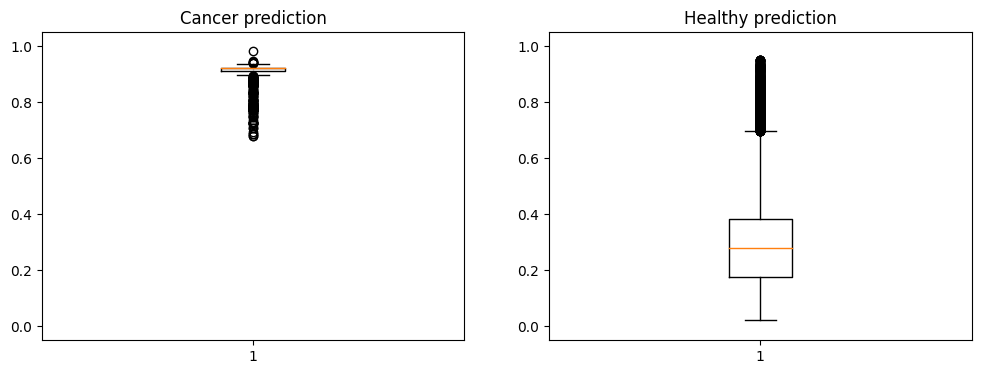

In [55]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

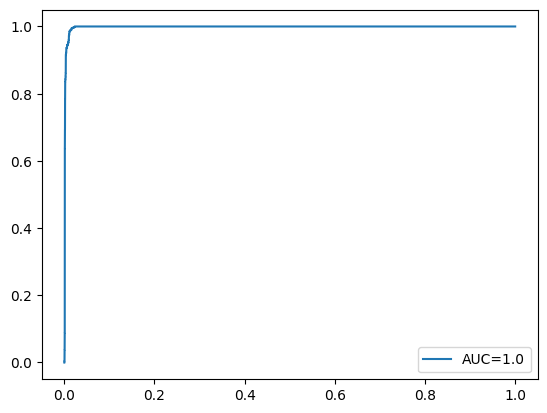

In [56]:
vis.draw_roc_curve_from_probabilities()

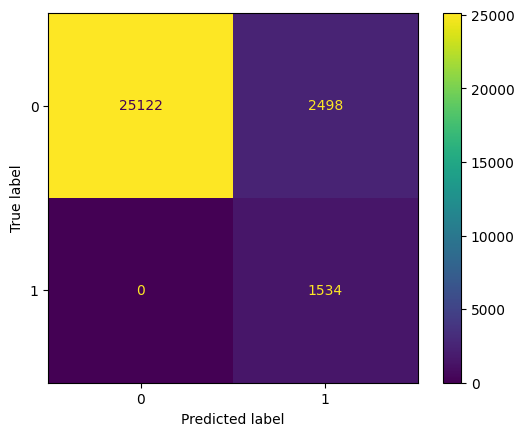

In [57]:
vis.display_confusion_matrix()

In [58]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.203501
ACTG1,0.137029
ZEB2,0.060994
HNRNPA2B1,0.060469
TMSB4X,0.045595
HLA-C,0.040506
MYL6,0.040289
B2M,0.037928
PFN1,0.033705
TPT1,0.031835


### Random Forest

In [59]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [60]:
rf_model_object = Model(
    rf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8109438870308435
Training balanced accuracy 1.0

Validation roc auc 0.9285581568190263
Training roc auc 1.0

Validation precision 0.9110144927536231
Training precision 1.0

Validation recall 0.9637681159420289
Training recall 1.0

Validation f1 0.9362922705314011
Training f1 1.0



In [61]:
rf_model_object.display_test_results()

Test balanced accuracy 0.6780140769322031

Test roc auc 0.6998467239159627

Test precision 0.0826036256160158

Test recall 0.9372012168622338

Test f1 score 0.1517793004128507


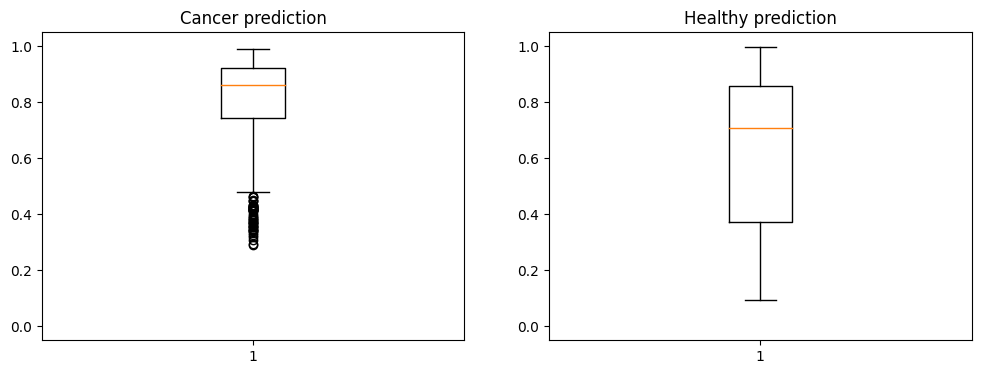

In [62]:
vis = Visualisation(rf_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

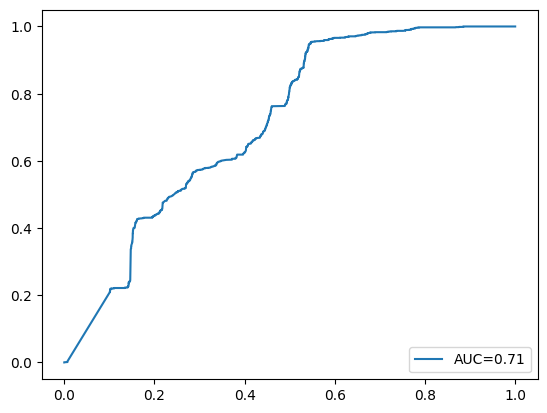

In [63]:
vis.draw_roc_curve_from_probabilities()

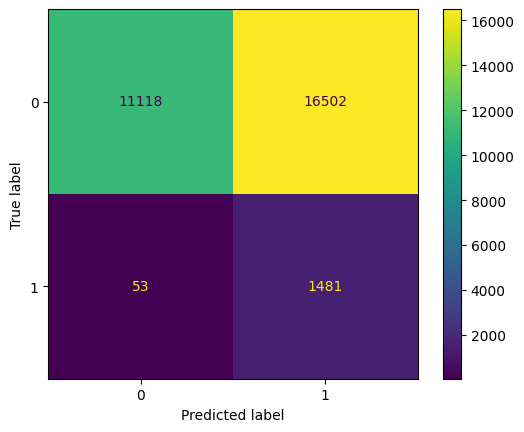

In [64]:
vis.display_confusion_matrix()

In [65]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.216890
MYCBP2,0.109590
CD14,0.095462
TWISTNB,0.090181
ZEB2-AS1,0.087060
MYCBP,0.077928
ZEB1,0.053484
SNAI3,0.051355
IL3RA,0.048070
MYCBP2-AS1,0.042634


### Cut by mean max and biological

In [66]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8936269044964696
Training balanced accuracy 1.0

Validation roc auc 0.9881549609810479
Training roc auc 1.0

Validation precision 0.9515731785944553
Training precision 1.0

Validation recall 0.9710144927536232
Training recall 1.0

Validation f1 0.9605436081242534
Training f1 1.0



In [67]:
rf_model_object.display_test_results()

Test balanced accuracy 0.767137340091721

Test roc auc 0.9989343329302093

Test precision 0.1489899414045546

Test recall 1.0

Test f1 score 0.24796695886421818


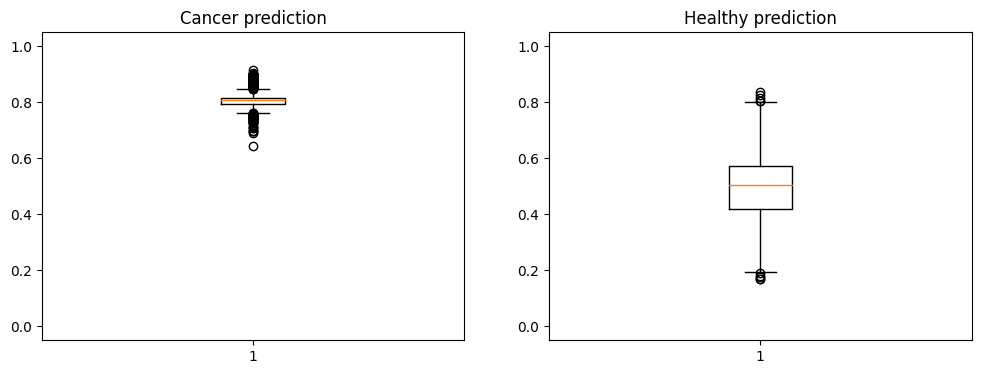

In [68]:
vis = Visualisation(rf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

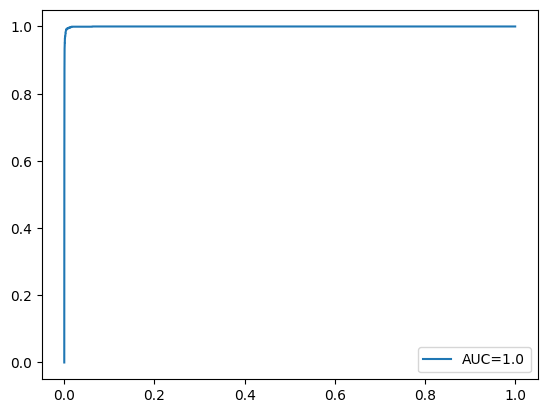

In [69]:
vis.draw_roc_curve_from_probabilities()

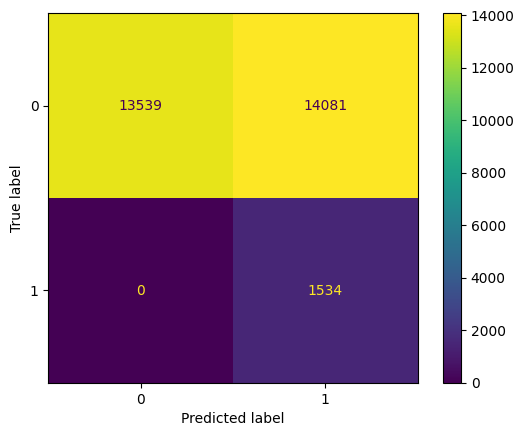

In [70]:
vis.display_confusion_matrix()

In [71]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.089974
HLA-E,0.078854
LMNA,0.065010
CD74,0.048138
CCL4,0.046153
...,...
SNAI1,0.000384
TWIST1,0.000377
MYCBPAP,0.000108
SNAI2,0.000080


### Cut by mean with classes and biological

In [72]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.886984392419175
Training balanced accuracy 1.0

Validation roc auc 0.9833704942400595
Training roc auc 1.0

Validation precision 0.9444263521011242
Training precision 1.0

Validation recall 0.9855072463768115
Training recall 1.0

Validation f1 0.9644603386755609
Training f1 1.0



In [73]:
rf_model_object.display_test_results()

Test balanced accuracy 0.7390296886314265

Test roc auc 0.9917608981203588

Test precision 0.10358837509449398

Test recall 1.0

Test f1 score 0.18676642596041101


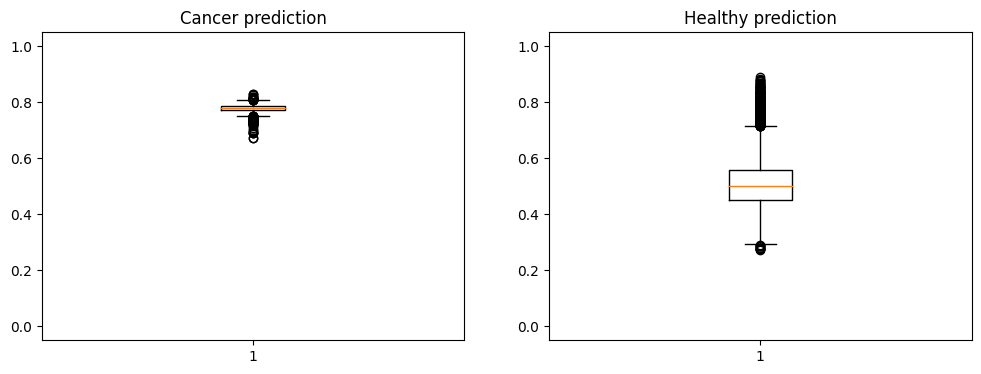

In [74]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

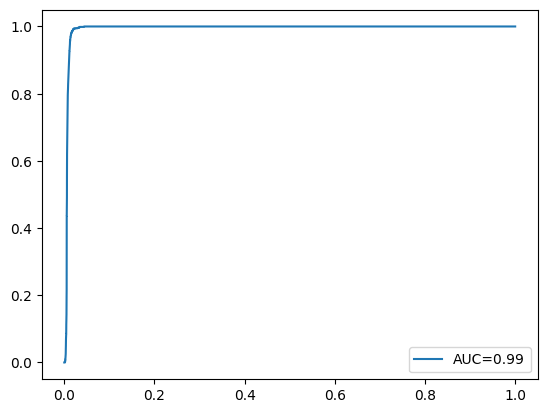

In [75]:
vis.draw_roc_curve_from_probabilities()

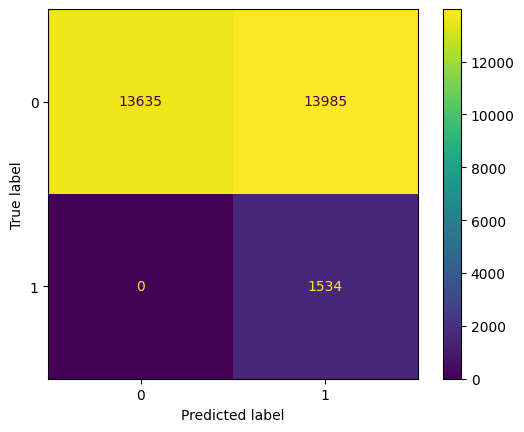

In [76]:
vis.display_confusion_matrix()

In [77]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.068351
ACTG1,0.063624
ZEB2,0.058812
B2M,0.056637
TPT1,0.056570
...,...
TWIST1,0.000453
SNAI3-AS1,0.000339
MYCBPAP,0.000206
SNAI2,0.000175


### Balanced Random Forest

In [78]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [79]:
brf_model_object = Model(
    brf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.8445745076179859
Training balanced accuracy 0.9673913043478262

Validation roc auc 0.9388703084355258
Training roc auc 0.9997101449275362

Validation precision 0.939855072463768
Training precision 1.0

Validation recall 0.8985507246376812
Training recall 0.9347826086956522

Validation f1 0.9177620492079542
Training f1 0.9662703837795785



In [80]:
brf_model_object.display_test_results()

Test balanced accuracy 0.6540808611688839

Test roc auc 0.6647902983339108

Test precision 0.08414109492854167

Test recall 0.8033463711429812

Test f1 score 0.1521596101016969


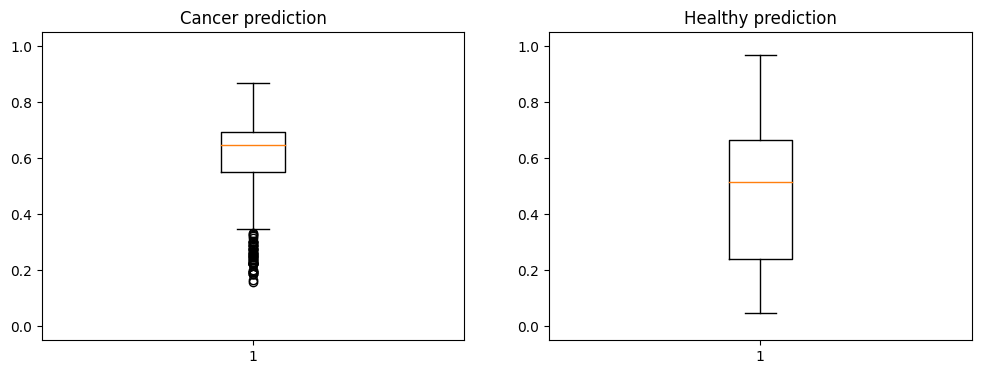

In [81]:
vis = Visualisation(brf_estimators, biological_features_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

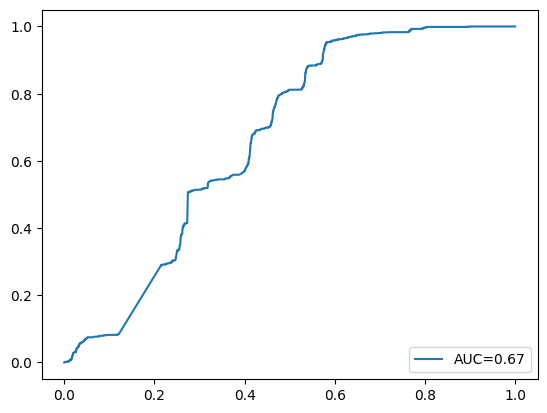

In [82]:
vis.draw_roc_curve_from_probabilities()

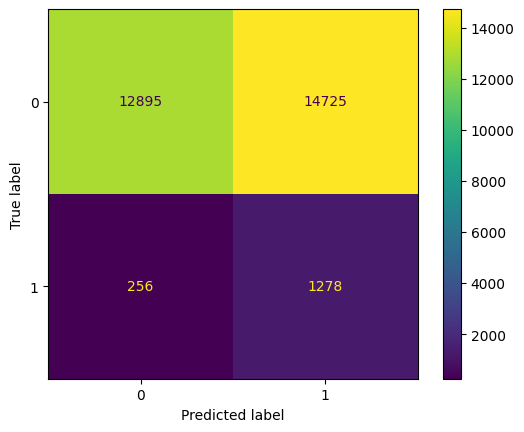

In [83]:
vis.display_confusion_matrix()

In [84]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.211105
MYCBP2,0.114241
MYCBP,0.113011
TWISTNB,0.112049
CD14,0.074814
ZEB2-AS1,0.067612
ZEB1,0.052370
MYC,0.049545
IL3RA,0.040647
MYCBP2-AS1,0.035317


### Cut by mean max and biological 

In [85]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9437012263099219
Training balanced accuracy 0.9746376811594203

Validation roc auc 0.9872259383128948
Training roc auc 1.0

Validation precision 0.9925925925925926
Training precision 1.0

Validation recall 0.9130434782608695
Training recall 0.9492753623188405

Validation f1 0.9503240535626523
Training f1 0.9739706186633561



In [86]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9907245330793116

Test roc auc 0.9994358739911274

Test precision 0.8359061414840453

Test recall 0.9945675793133422

Test f1 score 0.9011298996203992


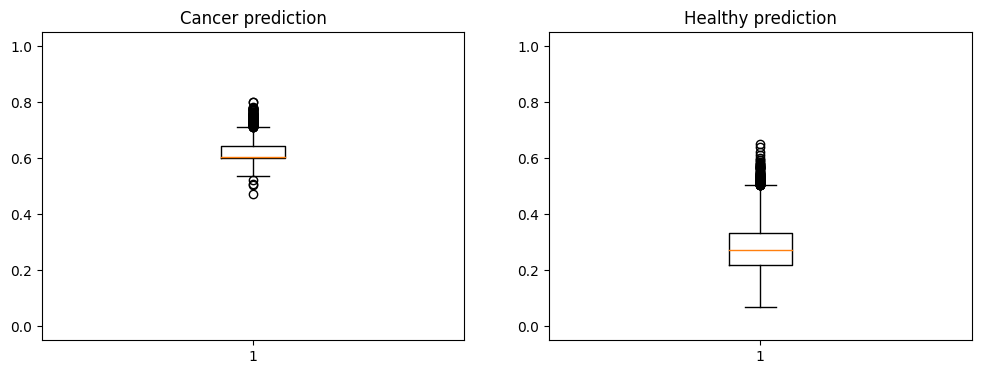

In [87]:
vis = Visualisation(brf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

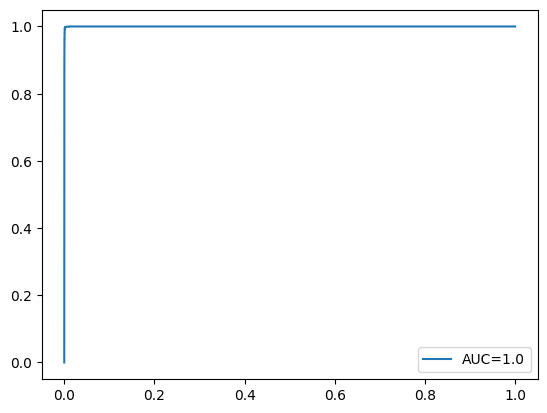

In [88]:
vis.draw_roc_curve_from_probabilities()

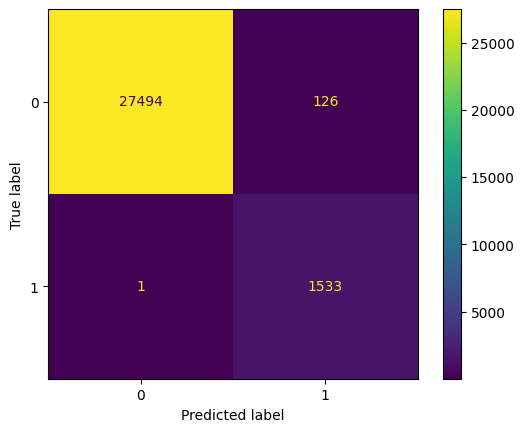

In [89]:
vis.display_confusion_matrix()

In [90]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,1.003759e-01
HLA-E,8.244384e-02
LMNA,5.723319e-02
ACTG1,5.613363e-02
FTL,4.956157e-02
...,...
TWIST1,4.655483e-04
MYCBPAP,3.375396e-04
SNAI2,2.450674e-04
SNAI3-AS1,1.820424e-04


### Cut by mean with classes and biological

In [91]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9298123374210331
Training balanced accuracy 0.9836956521739131

Validation roc auc 0.9863898179115571
Training roc auc 1.0

Validation precision 0.9846723044397464
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 0.967391304347826

Validation f1 0.9473015053022803
Training f1 0.9833426575321563



In [92]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9898500667625227

Test roc auc 0.998847319790753

Test precision 0.7545628393757938

Test recall 0.9980443285528032

Test f1 score 0.8584554438988242


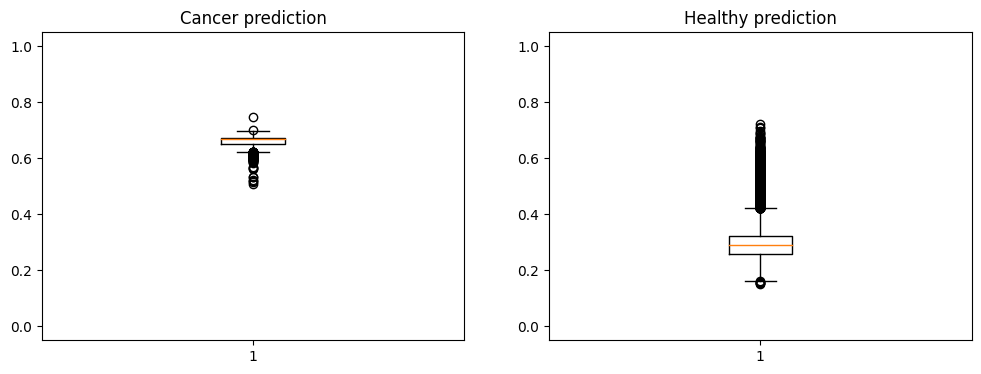

In [93]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes)
vis.plot_predictions_boxplot()

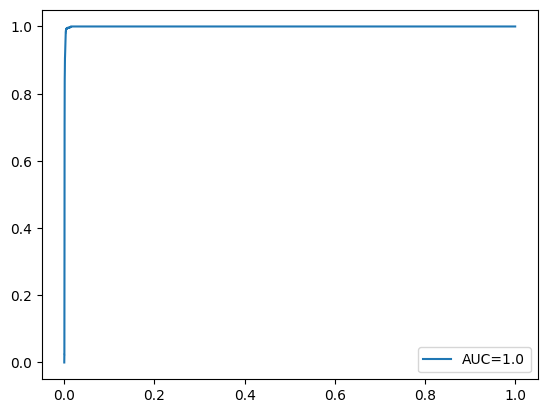

In [94]:
vis.draw_roc_curve_from_probabilities()

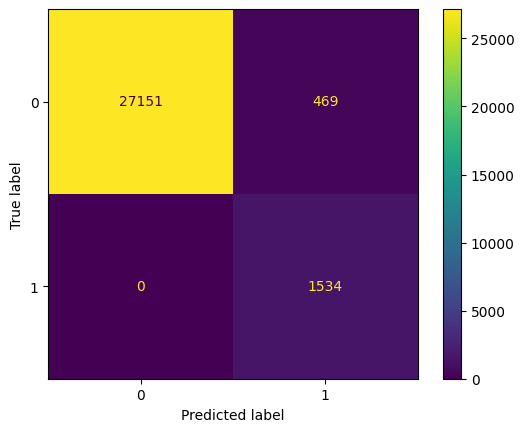

In [95]:
vis.display_confusion_matrix()

In [96]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.088686
ACTG1,0.084830
HLA-C,0.054176
TMSB4X,0.050816
B2M,0.050477
...,...
TWIST1,0.000943
MYCBPAP,0.000694
SNAI3-AS1,0.000519
SNAI2,0.000488
